In [1]:
import pandas as pd
import seaborn as sns

In [2]:
avalanche_set = pd.read_csv('newData/gesamt_set_1.csv', sep=',')

<AxesSubplot:>

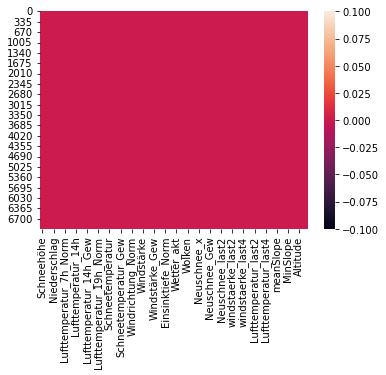

In [3]:
avalanche_set['ID'] = avalanche_set['ID'].fillna(0)
avalanche_set = avalanche_set.drop([ 'Datum','Intervall', 'ID'], axis=1)
avalanche_set = avalanche_set.dropna()


sns.heatmap(avalanche_set.isna())

In [4]:
from sklearn_genetic.plots import plot_fitness_evolution
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn_genetic import GAFeatureSelectionCV
from sklearn.linear_model import LogisticRegression

feature_names = avalanche_set.columns.drop('Avalanche')
X = avalanche_set[avalanche_set.columns.drop('Avalanche')]
y = avalanche_set['Avalanche']

#estimators = linear_model.LogisticRegression(solver="liblinear", multi_class="ovr")

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    cv=10,
    scoring="accuracy",
    population_size=60,
    generations=50,
    crossover_probability=0.2,
    mutation_probability=0.8,
    tournament_size=3,
    elitism=True,
    max_features=None,
    verbose=True,
    n_jobs=-1)

# Train and select the features
evolved_estimator.fit(X, y)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	60    	0.703365	0.0116249  	0.728945   	0.674111   
1  	120   	0.7123  	0.0064622  	0.730654   	0.690918   
2  	120   	0.718526	0.00607504 	0.730654   	0.707154   
3  	120   	0.724636	0.00459888 	0.731224   	0.712567   
4  	120   	0.728074	0.00287734 	0.731224   	0.720969   
5  	120   	0.729695	0.00171423 	0.732791   	0.724671   
6  	120   	0.730728	0.000962614	0.732791   	0.727949   
7  	120   	0.731241	0.000774428	0.732791   	0.728805   
8  	120   	0.731376	0.000940538	0.732791   	0.727235   
9  	120   	0.731568	0.00118015 	0.732791   	0.724672   
10 	120   	0.731687	0.000919331	0.733503   	0.728802   
11 	120   	0.73192 	0.00141514 	0.732934   	0.722965   
12 	120   	0.732098	0.000808375	0.733218   	0.729942   
13 	120   	0.732266	0.00118325 	0.733077   	0.725101   
14 	120   	0.732547	0.00103264 	0.733647   	0.72766    
15 	120   	0.732827	0.000427007	0.733362   	0.730798   
16 	120   	0.732808	0.00068526 	0.733362   	0.72

GAFeatureSelectionCV(cv=10,
                     estimator=Pipeline(steps=[('standardscaler',
                                                StandardScaler()),
                                               ('logisticregression',
                                                LogisticRegression(random_state=0))]),
                     generations=50, n_jobs=-1, population_size=60,
                     return_train_score=True, scoring='accuracy')

In [5]:
selected_features = evolved_estimator.best_features_
for i in range(0, len(selected_features)):
    if selected_features[i] == True:
        print("\'" + feature_names[i] + "\',")

'Schneehöhe',
'Lufttemperatur_7h',
'Lufttemperatur_14h_Gew',
'Lufttemperatur_19h',
'Lufttemperatur_19h_Norm',
'Lufttemperatur_19h_Gew',
'Schneetemperatur',
'Einsinktiefe',
'Wetter_akt',
'Wetter_gestern',
'Neuschnee_x',
'Neuschnee_Norm',
'Neuschnee_last4',
'Lufttemperatur_last1',
'Lufttemperatur_last4',
'meanExpo',
'meanSlope',
'MinSlope',
'MaxSlope',
'Altitude',


In [6]:
print(evolved_estimator.best_estimator_)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])


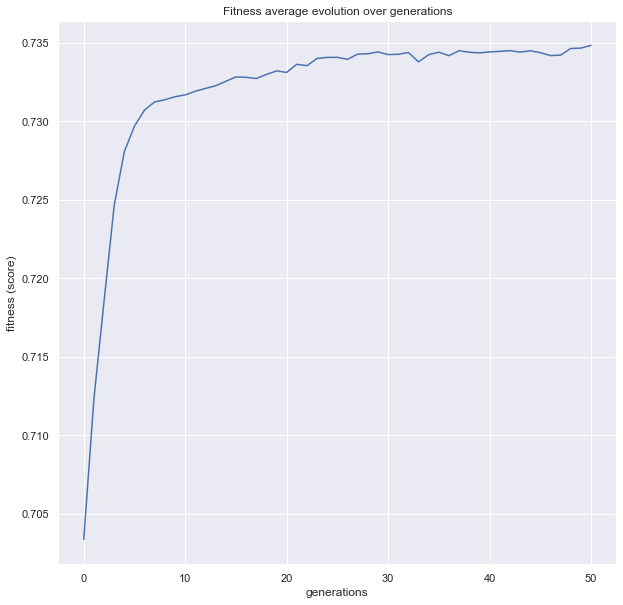

In [7]:
plot = plot_fitness_evolution(evolved_estimator, metric="fitness")
plt.show()